<a href="https://colab.research.google.com/github/abishekbabuofficial/Recommender-System-Ecommerce/blob/main/E_commerce_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧾🛒Recommender System for E-commerce
### Problem Statement:
Design a real-time recommendation system for an e-commerce platform. The system should provide product recommendations based on the user’s recent browsing or purchase history using collaborative filtering or content-based filtering.

### Implementation
The Recommendation system was built using the Hybrid Filtering technique that supersets the efficiency of Content-based filtering and Collaborative Filtering. Thus providing a higher range of accurate search recommendation as well as recommendation based on user's behaviours.

## Installation and Importation of Packages



In [1]:
!pip install --quiet scikit-surprise scikit-learn numpy pandas matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader, SVD
from sklearn.feature_extraction.text import TfidfVectorizer

## Data Processing

The below data loaded was a processed data which contains the products and their ratings with User-id.

Originated from: https://www.kaggle.com/datasets/promptcloud/walmart-product-review-dataset

In [3]:
data = pd.read_csv("/content/wallmart_data.csv")

In [4]:
data.columns

Index(['Unnamed: 0', 'ID', 'ProdID', 'Rating', 'ReviewCount', 'Category',
       'Brand', 'Name', 'ImageURL', 'Description', 'Tags'],
      dtype='object')

In [5]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
data.columns

Index(['ID', 'ProdID', 'Rating', 'ReviewCount', 'Category', 'Brand', 'Name',
       'ImageURL', 'Description', 'Tags'],
      dtype='object')

In [7]:
data.head()

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1705736792,2,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"premium, beauty, premium, makeup, premium, nai..."
1,95,76,0.0,0.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"pack, 3, pack, 3, upc, 381519000201, beautiful...","beauty, hair, care, hair, color, auburn, hair,..."
2,8,8,4.5,29221.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,"clairol, nice, n, easy, permanent, color, give...","beauty, hair, care, hair, color, permanent, ha..."
3,4,3,0.0,0.0,"beauty, makeup, lip","kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,"calling, matte, lip, lovers, indulge, rich, cr...","beauty, makeup, lip, kokie, cosmetics, calling..."
4,990,3,0.0,131.0,"seasonal, stock, essentials, personal, care, s...",gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"1971, gillette, introduced, trac, ii, razor, s...","seasonal, stock, essentials, personal, care, s..."


In [10]:
print(data.shape)
print(data.duplicated().sum())

(4090, 10)
0


In [11]:
data.isnull().sum()

,0
ID,0
ProdID,0
Rating,0
ReviewCount,0
Category,9
Brand,96
Name,0
ImageURL,0
Description,916
Tags,0


In [12]:
data['Category'].fillna('', inplace=True)
data['Brand'].fillna('', inplace=True)
data['Description'].fillna('', inplace=True)

<ipython-input-12-f70562c139e5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Category'].fillna('', inplace=True)
<ipython-input-12-f70562c139e5>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [13]:
data.isnull().sum()

,0
ID,0
ProdID,0
Rating,0
ReviewCount,0
Category,0
Brand,0
Name,0
ImageURL,0
Description,0
Tags,0


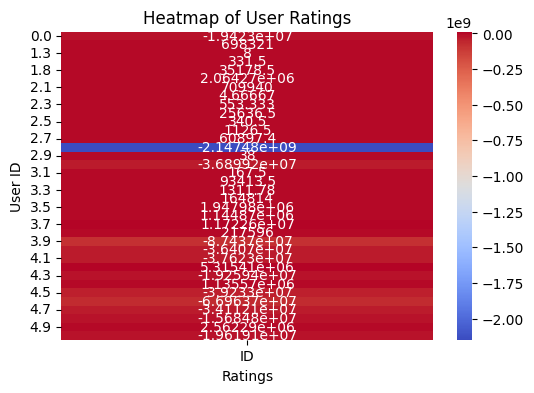

In [18]:
heatmap_data = data.pivot_table('ID', 'Rating')

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='coolwarm', cbar=True)
plt.title('Heatmap of User Ratings')
plt.xlabel('Ratings')
plt.ylabel('User ID')
plt.show()

## Content-Based Filtering

In the content-based Filtering we use TF-IDF technique that vectorizes the data frequency then using cosine similarity method we could recommend most relatable products to the users which they have queried. This is specifically used in Recommendation Search Engine that recommend most similar products while searching.

In [19]:
def content_based_filter(dataset, item_name, top_n=10):
    if item_name not in dataset['Name'].values:
        print("Item", item_name," not found in the data.")
        return pd.DataFrame()
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(dataset['Tags'])
    consine = cosine_similarity(tfidf_matrix, tfidf_matrix)
    item_index = dataset[dataset['Name'] == item_name].index[0]
    similar_items = list(enumerate(consine[item_index]))
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)
    top_similar_items = similar_items[1:top_n+1]
    recommended_item_indices = [x[0] for x in top_similar_items]
    recommended_items_details = dataset.iloc[recommended_item_indices][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]
    return recommended_items_details

Example of Content-based recommendations

We have searched for specific Lipstick and it also recommends top 8 Lipstick brands associated

In [20]:
item_name = 'Kokie Professional Matte Lipstick, Hot Berry, 0.14 fl oz'
content_based_rec = content_based_filter(data, item_name, top_n=8)

content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
2870,"Kokie Professional Matte Lipstick, Firecracker...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/8312221b-ed22...,0.0
525,"Kokie Professional Matte Lipstick, Kiss Me, 0....",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/27dd82a2-2b9c...,0.0
3371,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/fdd7498c-319f...,3.4
3398,e.l.f. Mad for Matte 4 Piece Lip Color Set,0.0,cosmetics,https://i5.walmartimages.com/asr/e2d30304-edc9...,0.0
1409,"LOreal Paris Colour Riche Matte Lip Liner, Mat...",495.0,paris,https://i5.walmartimages.com/asr/baf97085-7231...,4.4
2445,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/31c99d9b-ea11...,3.4
3758,Be Matte Lipstick - Soft Pink,2.0,"city, color",https://i5.walmartimages.com/asr/69e1ec63-be5e...,3.0
1194,Be Matte Lipstick - Baby Pink,2.0,"city, color",https://i5.walmartimages.com/asr/acadf0c0-739f...,3.0


## Collaborative-based Filtering

The collaborative filtering is used to implement recommendation for specific user. It is an user-based recommendation system that recommends specific products to unique individuals based on their behaviours on ratings and past history. This method uses the special package called **Surprise** from **Scikit** which leverages the methods of Matrix Factorizations and handling dataset for training.

The key aspect for the collaborative-filtering is **SVD - Singular Value Decomposition** which maintains a matrix that decomposes the values of similarity between users and their products and reviews.

Reference: https://surpriselib.com/ https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html

In [24]:
reader = Reader(rating_scale=(0, 5))
new_data = Dataset.load_from_df(data[['ID',
                                  'ProdID',
                                  'Rating']], reader)

algo = SVD()
trainset = new_data.build_full_trainset()
algo.fit(trainset)

In [36]:
def collaborative_based_filter(user_id, top_n):
    testset = trainset.build_anti_testset()
    testset = filter(lambda x: x[0] == user_id, testset)
    predictions = algo.test(testset)
    predictions.sort(key=lambda x: x.est, reverse=True)
    recommendations = [prediction.iid for prediction in predictions[:top_n]]
    recommended_items = data[data['ProdID'].isin(recommendations)][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]
    return recommended_items.head(top_n)
    # return recommendations

In [52]:
target_user_id = 4
top_n = 10
collaborative_filtering = collaborative_based_filter(target_user_id,top_n)
collaborative_filtering

,Name,ReviewCount,Brand,ImageURL,Rating
47,Sexy Hair Concepts Healthy Sexy Hair Tri-Wheat...,10.0,"sexy, hair",https://i5.walmartimages.com/asr/125be654-1d2d...,4.6
90,Hard Candy Powder Keg Loose Eyeshadow 300 Reve...,4.0,"hard, candy",https://i5.walmartimages.com/asr/d2389c1d-9a2a...,4.5
146,Olay Complete Daily Moisturizer for Sensitive ...,737.0,olay,https://i5.walmartimages.com/asr/f8946948-5c8a...,4.7
195,"RepHresh Pro-B Probiotic Supplement for Women,...",5424.0,rephresh,https://i5.walmartimages.com/asr/d4600e4f-340c...,4.1
244,Joico 4048340 By Joico Joifix Firm Finishing S...,0.0,joico,https://i5.walmartimages.com/asr/7142f118-815b...,0.0
330,"Revlon Nail Polish, Chip Resistant Enamel, Glo...",922.0,revlon,https://i5.walmartimages.com/asr/8da4a91c-218f...,4.1
433,Fructis Power Gel Go Loco Slick,4.0,fructis,https://i5.walmartimages.com/asr/c755bc6b-5f60...,4.8
487,Genuine Joe Professional Strength Lemon Dish D...,14.0,"genuine, joe",https://i5.walmartimages.com/asr/89380ddf-baa6...,4.2
488,"Maybelline Color Sensational The Creams, Cream...",745.0,maybelline,https://i5.walmartimages.com/asr/14824142-fb2e...,0.0
505,(2 Pack) Kool-Aid Sugar-Free Orange Liquid Wat...,316.0,"kool, aid",https://i5.walmartimages.com/asr/88e9a2ff-f9ba...,4.6


## Hybrid Recommendation
This is the combination of context-based filtering and collobaration-based Filetering

In [50]:
def hybrid_recommendations(train_data,target_user_id, item_name, top_n):

    content = content_based_filter(train_data,item_name, top_n)

    collaborative = collaborative_based_filter(target_user_id, top_n)

    hybrid_rec = pd.concat([content, collaborative]).drop_duplicates()

    return hybrid_rec.head(top_n)

## Testing

In [51]:
target_user_id = 4
top_n = 10
item_name = "OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11"
hybrid_rec = hybrid_recommendations(data,target_user_id, item_name, top_n)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 4 and Item 'OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11':


,Name,ReviewCount,Brand,ImageURL,Rating
155,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,0.0
183,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,0.0
203,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,0.0
234,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,0.0
318,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,0.0
366,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
392,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
671,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0
820,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi,https://i5.walmartimages.com/asr/98b4194c-e026...,0.0
952,"OPI GelColor Gel Nail Polish, Dulce De Leche, ...",1.0,opi,https://i5.walmartimages.com/asr/c1b2c370-b2d2...,0.0


Code Created by: Abishek Babu
Reach out my GitHub for dataset and implementation: https://github.com/abishekbabuofficial/Recommender-System-Ecommerce